In [ ]:
import pandas as pd
import numpy as np
import  sklearn

In [ ]:
data=pd.read_csv(r'/content/drive/MyDrive/myntra_products_catalog.csv')

In [ ]:
data.head(5)

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White


In [ ]:
unique_counts = data.nunique()

print(unique_counts)

ProductID       12491
ProductName     10761
ProductBrand      677
Gender              6
Price (INR)      1543
NumImages          10
Description     10435
PrimaryColor       27
dtype: int64


In [ ]:
data['Price (INR)'].value_counts()

Price (INR)
699      510
1299     464
1999     312
599      295
899      254
        ... 
2514       1
1918       1
10450      1
2245       1
8950       1
Name: count, Length: 1543, dtype: int64

In [ ]:
data['Gender'].value_counts()

Gender
Women          5126
Men            4591
Unisex         1188
Boys           1100
Girls           440
Unisex Kids      46
Name: count, dtype: int64

In [ ]:
data['PrimaryColor'].value_counts()

PrimaryColor
Blue         3443
 Black       1640
 Red         1543
 Green        908
 White        880
 Grey         684
 Brown        473
 Yellow       406
 Pink         391
 Gold         236
 Beige        236
 Maroon       187
 Orange       130
 Silver       111
 Purple        65
 Burgundy      64
 Khaki         56
 Navy          54
 Lavender      19
 Matte         17
 Mustard       15
 Magenta       13
 Charcoal      10
 Rose           8
 Platinum       3
 Bronze         3
 Peach          2
Name: count, dtype: int64

In [ ]:
data['ProductBrand'].value_counts()

ProductBrand
Indian Terrain                  971
Puma                            345
Pepe Jeans                      340
AURELIA                         307
Flying Machine                  301
                               ... 
Johnny Bravo by Kook N Keech      1
Allen Solly Sport                 1
HAMMER                            1
CUTECUMBER                        1
Stupid Cupid                      1
Name: count, Length: 677, dtype: int64

In [ ]:
data.shape

(12491, 8)

In [ ]:
data.describe()

,ProductID,Price (INR),NumImages
count,1.249100e+04,12491.000000,12491.000000
mean,9.917160e+06,1452.660956,4.913698
std,1.438006e+06,2118.503976,1.092333
min,1.012060e+05,90.000000,1.000000
25%,1.006215e+07,649.000000,5.000000
50%,1.015463e+07,920.000000,5.000000
75%,1.021565e+07,1499.000000,5.000000
max,1.027514e+07,63090.000000,10.000000


In [ ]:
most_expensive_products = data.groupby(['Gender'])[['ProductName','Price (INR)']].max()

# Display the most expensive products for each category
print(most_expensive_products)

                                                   ProductName  Price (INR)
Gender                                                                     
Boys         t-base Boys Yellow Colourblocked Lightweight J...         3999
Girls        t-base Girls Red Printed Lightweight Puffer Ja...         3800
Men          plusS Men Navy Blue Solid Straight-Fit Trackpants        58854
Unisex       fancy mart Yellow & Green Artificial Flowers a...        63090
Unisex Kids  berrytree Unisex Navy Blue Solid Polo Collar S...         1799
Women                             yelloe Black Solid Sling Bag        56192


In [ ]:
data.isnull().sum()

ProductID         0
ProductName       0
ProductBrand      0
Gender            0
Price (INR)       0
NumImages         0
Description       0
PrimaryColor    894
dtype: int64

In [ ]:
data['PrimaryColor'] = data['PrimaryColor'].fillna('Unknown')

In [ ]:
data.isnull().sum()

ProductID       0
ProductName     0
ProductBrand    0
Gender          0
Price (INR)     0
NumImages       0
Description     0
PrimaryColor    0
dtype: int64

In [ ]:
data_selected=data[['ProductBrand','Gender','Price (INR)','PrimaryColor']]

In [ ]:
data_selected.head()

,ProductBrand,Gender,Price (INR),PrimaryColor
0,DKNY,Unisex,11745,Black
1,EthnoVogue,Women,5810,Beige
2,SPYKAR,Women,899,Pink
3,Raymond,Men,5599,Blue
4,Parx,Men,759,White


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
data_selected['ProductBrand_encoded'] = label_encoder.fit_transform(data_selected['ProductBrand'])
data_selected['Gender_encoded'] = label_encoder.fit_transform(data_selected['Gender'])
data_selected['PrimaryColor_encoded'] = label_encoder.fit_transform(data_selected['PrimaryColor'])

<ipython-input-7-5c6c0c99e62c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['ProductBrand_encoded'] = label_encoder.fit_transform(data_selected['ProductBrand'])
<ipython-input-7-5c6c0c99e62c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['Gender_encoded'] = label_encoder.fit_transform(data_selected['Gender'])
<ipython-input-7-5c6c0c99e62c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [ ]:
def price_cat(x):
  if x<1000:
    return 'below 1000'
  elif x>1000 and x<2000:
    return '1000-2000'
  elif x>2000 and x<3000:
    return '2000-3000'
  elif x>3000 and x<4000:
    return '3000-4000'
  elif x>4000 and x<5000:
    return '4000-5000'
  elif x>5000 and x<6000:
    return '1000-2000'
  else :
    return 'above 6000'

In [ ]:
price_cat(150)

'below 1000'

In [ ]:
data_selected['Price (INR)']=data_selected['Price (INR)'].apply(price_cat)

<ipython-input-9-9ed475013a1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['Price (INR)']=data_selected['Price (INR)'].apply(price_cat)


In [ ]:
data_selected['Price_encoded'] = label_encoder.fit_transform(data_selected['Price (INR)'])

In [ ]:
data_selected.drop(columns=['Price (INR)','ProductBrand','Gender','PrimaryColor'], inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

data_selected = scaler.fit_transform(data_selected)

In [ ]:
df = pd.DataFrame(data_selected)

In [ ]:
df.head()

,0,1,2,3
0,0.213018,0.6,0.037037,0.8
1,0.264793,1.0,0.000000,0.0
2,0.736686,1.0,0.666667,1.0
3,0.689349,0.4,0.962963,0.0
4,0.633136,0.4,0.888889,1.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity_matrix = cosine_similarity(df)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Description'].fillna(''))



In [ ]:
from sklearn.metrics.pairwise import sigmoid_kernel

In [ ]:
sig=sigmoid_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
import pandas as pd

In [ ]:
indices=pd.Series(data.index,index=data['ProductName']).drop_duplicates()

In [ ]:
indices.tail(15)

ProductName
Calvin Klein Jeans Men Blue Regular Fit Solid Casual Shirt                     12476
Sonari Pack of 2 Bras cristina                                                 12477
Pepe Jeans Men Navy Blue Printed Round Neck T-shirt                            12478
Vero Moda Women Black & White Checked Top                                      12479
INVU Men Blue Aviator Sunglasses B2945B                                        12480
Sonari Pack of 2 Bras afreen                                                   12481
Belle Fille Women Olive Green & White Polka Dot Print Basic Jumpsuit           12482
Sonari Pack of 2 Full-Coverage Bras celina                                     12483
Pepe Jeans Men Blue Printed Slim Pure Cotton Round Neck T-shirt                12484
Laceandme Black Lace Non-Wired Lightly Padded Bralette Bra 4760                12485
Pepe Jeans Men Black Hammock Slim Fit Low-Rise Clean Look Stretchable Jeans    12486
Mochi Women Gold-Toned Solid Heels                   

In [ ]:
indices.head(14)

ProductName
DKNY Unisex Black & Grey Printed Medium Trolley Bag                                           0
EthnoVogue Women Beige & Grey Made to Measure Custom Made Kurta Set with Jacket               1
SPYKAR Women Pink Alexa Super Skinny Fit High-Rise Clean Look Stretchable Cropped Jeans       2
Raymond Men Blue Self-Design Single-Breasted Bandhgala Suit                                   3
Parx Men Brown & Off-White Slim Fit Printed Casual Shirt                                      4
SHOWOFF Men Brown Solid Slim Fit Regular Shorts                                               5
Parx Men Blue Slim Fit Checked Casual Shirt                                                   6
SPYKAR Women Burgundy Alexa Super Skinny Fit High-Rise Clean Look Stretchable Ankle Jeans     7
Parx Men Brown Tapered Fit Solid Regular Trousers                                             8
DKNY Unisex Black Large Trolley Bag                                                           9
Kenneth Cole Women Navy Blue

In [ ]:
# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [ ]:
def recommend_similar_products(ProductName, sig=sig):
    idx = indices[ProductName]
    sig_scores=list(enumerate(sig[idx]))
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)
    sig_scores=sig_scores[1:11]
    similar_product_indices = [i[0] for i in sig_scores]
    return data['ProductName'].iloc[similar_product_indices]


In [ ]:
data['ProductName'].head()

0    DKNY Unisex Black & Grey Printed Medium Trolle...
1    EthnoVogue Women Beige & Grey Made to Measure ...
2    SPYKAR Women Pink Alexa Super Skinny Fit High-...
3    Raymond Men Blue Self-Design Single-Breasted B...
4    Parx Men Brown & Off-White Slim Fit Printed Ca...
Name: ProductName, dtype: object

In [ ]:
recommend_similar_products('DKNY Unisex Black & Grey Printed Medium Trolley Bag')

273    DKNY Unisex Black & Grey Printed Cabin Trolley...
497    DKNY Unisex Black & Grey Printed Large Trolley...
853    DKNY Unisex Gold-Toned & White Striped Medium ...
123    DKNY Unisex Gold & White Printed Cabin Trolley...
141    DKNY Unisex Gold & White Printed Large Trolley...
478                 DKNY Unisex Black Medium Trolley Bag
504                DKNY Unisex Silver Medium Trolley Bag
382                 DKNY Unisex Black Medium Trolley Bag
389                DKNY Unisex Purple Medium Trolley Bag
178                DKNY Unisex Silver Medium Trolley Bag
Name: ProductName, dtype: object

In [ ]:
recommend_similar_products('Parx Men Brown & Off-White Slim Fit Printed Casual Shirt')

607          Parx Men White Slim Fit Printed Casual Shirt
2912    ColorPlus Men White Regular Fit Printed Casual...
5941    Indian Terrain Men Off-White Slim Fit Printed ...
6114    Indian Terrain Men White Slim Fit Printed Casu...
7071        WROGN Men White Slim Fit Printed Casual Shirt
9741    The Indian Garage Co Men White Slim Fit Printe...
6429    Indian Terrain Men Brown & White Chiseled Fit ...
8620    Mufti Men Off-White & Brown Regular Fit Checke...
9656    The Indian Garage Co Men Brown & White Slim Fi...
89      Parx Men Blue & Off-White Slim Fit Printed Cas...
Name: ProductName, dtype: object

In [ ]:
recommend_similar_products('Vishudh Women Maroon Printed Kurta with Palazzos')

3212    Vishudh Women Maroon & Gold-Toned Printed Kurt...
1447       Vishudh Women Blue Printed Kurta with Palazzos
1655      Varanga Women White Printed Kurta with Palazzos
6432    Bhama Couture Women Red Self Design Kurta with...
9601    Ahalyaa Women Grey & Pink Printed Kurta with P...
882     Sera Women Off-White & Blue Printed Kurta with...
3295      Vishudh Women Green Printed Kurta with Palazzos
1618    Vishudh Women Yellow & Red Printed Kurta with ...
369     Sera Women Sea Green & Maroon Printed Kurta wi...
30            Sera Women Blue Printed Kurta with Palazzos
Name: ProductName, dtype: object

In [ ]:
# Group by 'PrimaryColor' and calculate mean and median price
color_price_summary = data.groupby('PrimaryColor')['Price (INR)'].agg(['mean', 'median', 'count'])


In [ ]:
print(color_price_summary)

                     mean  median  count
PrimaryColor                            
 Beige        1402.004237  1159.5    236
 Black        1951.487805  1119.0   1640
 Bronze        588.000000   696.0      3
 Brown        1540.021142  1034.0    473
 Burgundy     1389.531250   820.0     64
 Charcoal     1306.500000   709.0     10
 Gold         1829.025424   971.0    236
 Green        1217.830396   879.0    908
 Grey         1525.320175  1102.0    684
 Khaki        1325.803571  1079.0     56
 Lavender     1118.894737   899.0     19
 Magenta       813.307692   599.0     13
 Maroon       1362.828877   899.0    187
 Matte        1438.823529  2295.0     17
 Mustard      1129.933333  1097.0     15
 Navy         1304.388889   889.0     54
 Orange       1039.984615   749.0    130
 Peach         534.500000   534.5      2
 Pink         1193.961637   899.0    391
 Platinum     2183.333333  2520.0      3
 Purple       2246.923077   799.0     65
 Red          1273.090732   899.0   1543
 Rose         28

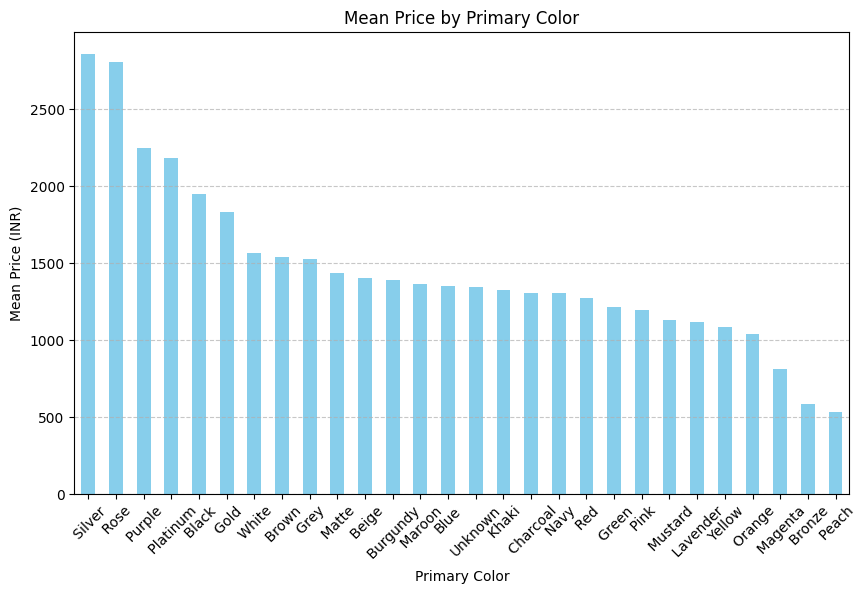

In [ ]:
import matplotlib.pyplot as plt

# Plot mean price by color
color_price_summary.sort_values(by='mean', ascending=False)['mean'].plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Mean Price by Primary Color')
plt.xlabel('Primary Color')
plt.ylabel('Mean Price (INR)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Define a threshold for higher-priced products
price_threshold = data['Price (INR)'].quantile(0.75)  # Example: 75th percentile
higher_priced_products = data[data['Price (INR)'] > price_threshold]


In [ ]:
# Count frequencies of each color among higher-priced products
color_counts = higher_priced_products['PrimaryColor'].value_counts()


In [ ]:
most_common_color = color_counts.idxmax()
count_highest = color_counts.max()

print(f"The most common color associated with higher-priced products is '{most_common_color}' with {count_highest} occurrences.")


The most common color associated with higher-priced products is 'Blue' with 679 occurrences.


In [ ]:
# Group by 'PrimaryColor' and calculate mean price
color_price_summary = data.groupby('PrimaryColor')['Price (INR)'].mean().sort_values(ascending=False)


In [ ]:
most_common_high_price_color = color_price_summary.idxmax()
highest_avg_price = color_price_summary.max()

print(f"The most common color associated with increased prices is '{most_common_high_price_color}' with an average price of {highest_avg_price:.2f} INR.")


The most common color associated with increased prices is ' Silver' with an average price of 2857.13 INR.


In [ ]:
#High-End Brands:
#Certain colors may be associated with luxury or high-end brands, leading to higher prices due to brand perception.
#Trend Influence:
#Colors influenced by current fashion trends or celebrity endorsements may command higher prices.
#Seasonal Variations:
#Seasonal colors or patterns may see price fluctuations based on demand and supply dynamics.
#Consumer Demand:
#Consumer preferences for specific colors based on cultural or personal reasons can drive prices up.